In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("CCC_Data.csv")
df.head()


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
import sklearn.preprocessing as pre_process
import numpy as np
ordinal_encoding=pre_process.OrdinalEncoder()
standered_scalling=pre_process.StandardScaler()

In [4]:
from sklearn.compose import make_column_transformer
# preprocess: standard scaling the columns
transform_x=make_column_transformer((standered_scalling,
                                     ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']))

In [5]:
X=df.iloc[:,0:7]
# seperating the features in X

In [6]:
processed_x=transform_x.fit_transform(X)
#pre-processing the X value into numpy arrays

In [7]:
from sklearn.cluster import KMeans
# a random value of k which determines number of clusters to be made
k = 2
# kmeans a variable that has KMeans model with k=2
kmeans = KMeans(n_clusters=k)
# making a prediction using the function variable made and making it into NP array
y_pred = kmeans.fit_predict(processed_x)
y_pred


array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [15]:
clusters=X
clusters['Label']=y_pred
clusters
#adding a label column to a copy of original data

C:\Users\AB\AppData\Local\Temp\ipykernel_10756\934750714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusters['Label']=y_pred


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Label
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,2
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,1
4,5,47437,100000,6,0,12,3,0
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,0
656,657,60732,84000,10,1,13,2,0
657,658,53834,145000,8,1,9,1,0
658,659,80655,172000,10,1,15,0,0


In [9]:
from sklearn.metrics import silhouette_score
score=[] 
k_list=[]
inertia=[]
group=1
for k in range(2,22): # k initially was 2, now run the loop for k=2 to 21
    model = KMeans(n_clusters=k) # another model variable having KMean alg with k clusters
    labels = model.fit_predict(processed_x) #labels being predicted using fit_predict()
    score.append(silhouette_score(processed_x,labels)) #score list being appended using silhouette_score function and passing x and labels
    k_list.append(k) #appending the list of number of clusters made
    inertia.append(model.inertia_) #inertia list being appended which shows means square distance of points from center of cluster
    group=group+1 #counter incremented

In [10]:
results=pd.DataFrame({"K":k_list,"score":score,'inertia':inertia})
results

,K,score,inertia
0,2,0.418425,2040.989816
1,3,0.515718,933.043749
2,4,0.355667,780.773690
3,5,0.271747,704.475919
4,6,0.255664,642.244868
5,7,0.248572,600.049543
6,8,0.227503,563.329561
7,9,0.218809,537.177087
8,10,0.219282,514.654964
9,11,0.219342,484.987021


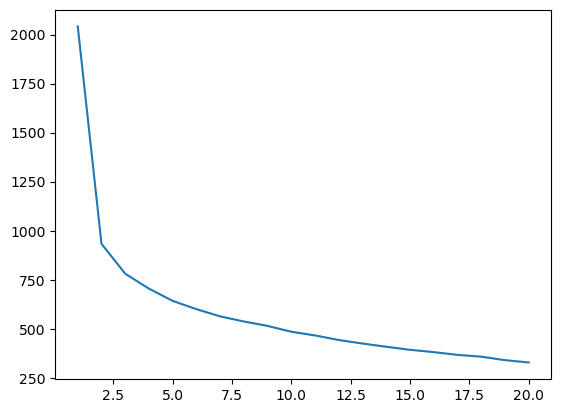

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(1,group),inertia) #inertia values on y-axis and number of clusters on x

In [12]:
from sklearn.cluster import KMeans
k = 3 #using k=3 because it is the best recommended number of clusters
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(processed_x)
y_pred


array([1, 2, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

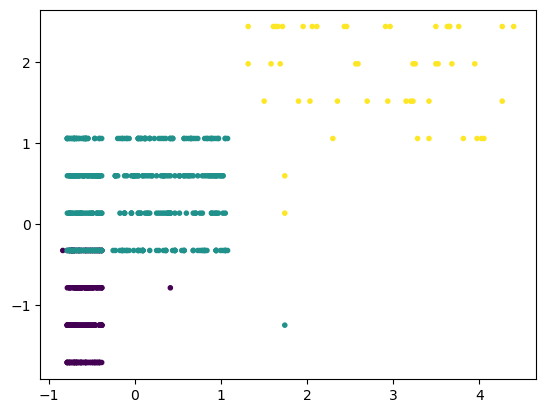

In [25]:
k = 3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(processed_x)

plt.scatter(processed_x[:, 0], processed_x[:, 1], c=y_pred,marker=".", cmap='viridis')
plt.show()